# Вариант 6

## ПРИБЛИЖЕНИЕ ФУНКЦИЙ
## Задачи № 6.1.6, 6.3.3, 6.7.3, 6.9.3

## №6.1.6

### Функция y = f(x) задана таблицей значений y0, y1, ..., yn в точках x0, x1, ..., xn. Используя метод наименьших квадратов, найти многочлен наилучшего среднеквадратичного приближения оптимальной степени m = m∗. За оптимальное решение принять ту степень, начиная с которой величина:
    x   y
    0 -0.9
    0.2 -0.6482
    0.4 -0.2436
    0.6 -0.1
    0.8 0.0231
    1 0.0260
    1.2 0.0967
    1.4 -0.2203
    1.6 -0.3230
    1.8 -0.6472
    2 -0.7630

### 1. 

In [318]:
import numpy as np

In [320]:
x = np.array([0 , 0.2 , 0.4 , 0.6 , 0.8 , 1 , 1.2 , 1.4 , 1.6 , 1.8 , 2])

In [322]:
y = np.array([ -0.9, -0.6482, -0.2436, -0.1, 0.0231, 0.0260, 0.0967, -0.2203, -0.3230, -0.6472, -0.7630])

### 2. 

In [325]:
def mnk(x, y):
    coef = []
    sigmas = []
    for m in range(len(x) - 1):
        A = np.vstack([x**i for i in range(m+1)]).T
        c = np.linalg.lstsq(A, y, rcond=None)[0]
        y_pred = A.dot(c)
    
        sigma_m = np.sqrt(np.sum((y - y_pred) ** 2) / (len(x) - 1 - m))
    
        coef.append(c)
        sigmas.append(sigma_m)
    
    return coef, sigmas

In [327]:
coef, sigmas = mnk(x, y)

In [329]:
sigmas

[0.3492496981192162,
 0.36803099391878463,
 0.08486257415967888,
 0.07945739429085573,
 0.06836089494763767,
 0.0741236028771977,
 0.0764151743439255,
 0.08250416595026855,
 0.08590157219793976,
 0.09965741877619214]

In [331]:
np.argmin(sigmas)

4

In [333]:
coef[np.argmin(sigmas)]

array([-0.90905594,  1.4911081 ,  0.48474432, -1.38154866,  0.39144449])

### 3. 

Text(0, 0.5, 'Среднеквадратичная ошибка (sigma_m)')

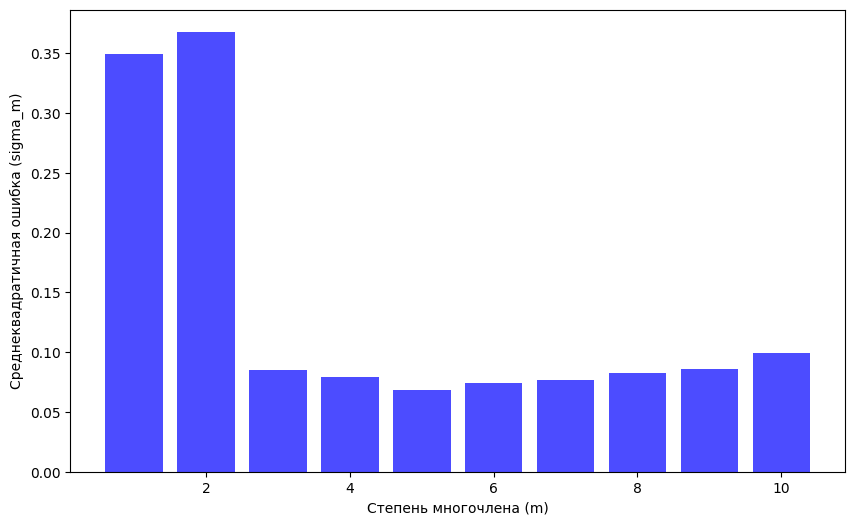

In [92]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(x)), sigmas, color='blue', alpha=0.7)
plt.xlabel('Степень многочлена (m)')
plt.ylabel('Среднеквадратичная ошибка (sigma_m)')

### 4. 

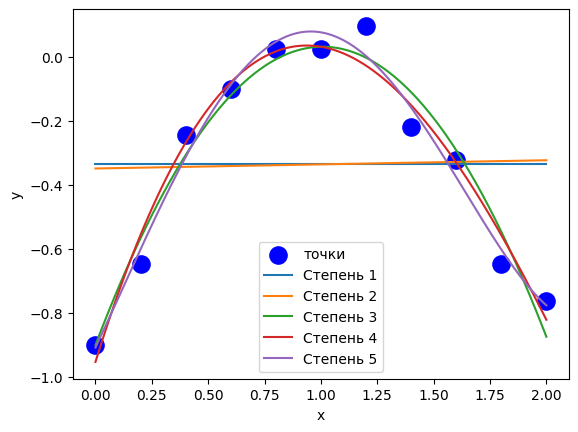

In [355]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color='blue', label='точки', s = 154)
xs = np.linspace(min(x), max(x), 1000)
for m, c in enumerate(coef[0:5]):
    ys = np.polyval(c[::-1], xs)
    plt.plot(xs, ys, label=f'Степень {m+1}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Оптимальная степень m*=5 многочлена наилучшего среднеквадратичного приближения

## №6.3.3

### f(x, a, b) = a + b * ln(x)
### y = a + b * ln(x)
### y = a + b * t

In [271]:
x = np.log(np.arange(0.1, 1.2, 0.1))

In [273]:
x

array([-2.30258509, -1.60943791, -1.2039728 , -0.91629073, -0.69314718,
       -0.51082562, -0.35667494, -0.22314355, -0.10536052,  0.        ,
        0.09531018])

In [130]:
y = np.array([0.479, 0.7562, 0.9184, 1.0335, 1.1227, 1.1957, 1.2573, 1.3107, 1.3579, 1.4, 1.4381])

In [131]:
y

array([0.479 , 0.7562, 0.9184, 1.0335, 1.1227, 1.1957, 1.2573, 1.3107,
       1.3579, 1.4   , 1.4381])

In [133]:
def coefficient_reg_inv_analit(x, y):
    size = len(x)
    numerator_w1 = size*sum(x[i]*y[i] for i in range(0,size )) - sum(x)*sum(y)
    denominator = size*sum((x[i])**2 for i in range(0,size )) - (sum(x))**2
    numerator_w0 = -sum(x)*sum(x[i]*y[i] for i in range(0,size )) + sum((x[i])**2 for i in range(0,size ))*sum(y)
    
    b = numerator_w1/denominator
    a = numerator_w0/denominator
    return a, b

In [135]:
a, b = coefficient_reg_inv_analit(x, y)
print(f"y = {a} + {b} * t, где t = ln(x)")

y = 1.399989343221 + 0.399991247856961 * t, где t = ln(x)


## №6.7.3

### Дана кусочно-гладкая функция y=f(x). Сравнить качество приближения функции кусочно-линейной и глобальной интерполяциями.

### y = 1 / (2 + |x|)
### Отрезок [-2, 2]

In [11]:
import numpy as np
import matplotlib.pyplot as plt
k = int(input())
x_m = -2
x_M = 2
x = np.linspace(x_m, x_M, k)
wide_x = np.linspace(x_m, x_M, 3*k)

 10


In [13]:
y = 1 / (2 + np.abs(x))
wide_y = 1 / (2 + np.abs(wide_x)) 

In [15]:
print('x = ', x,'\ny = ', y)

x =  [-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ] 
y =  [0.25       0.28125    0.32142857 0.375      0.45       0.45
 0.375      0.32142857 0.28125    0.25      ]


In [23]:
def linear_inter(x, y):
    x = np.array(x)
    y = np.array(y)
    
    x_i = []
    y_i = []
    
    for i in range(len(x) - 1):
        b = (y[i+1] - y[i]) / (x[i+1] - x[i])
        a = y[i] - b * x[i]
        
        x_segment = np.linspace(x[i], x[i+1], 3*k)
        y_segment = a + b * x_segment
        
        if i > 0:
            x_segment = x_segment[1:]
            y_segment = y_segment[1:]
        
        x_i.extend(x_segment)
        y_i.extend(y_segment)
    
    return np.array(x_i), np.array(y_i)

In [25]:
lin_x, lin_y = linear_inter(x,y)

In [27]:
print('lin_x = ', lin_x,'\nlin_y = ', lin_y)

lin_x =  [-2.         -1.98467433 -1.96934866 -1.95402299 -1.93869732 -1.92337165
 -1.90804598 -1.89272031 -1.87739464 -1.86206897 -1.8467433  -1.83141762
 -1.81609195 -1.80076628 -1.78544061 -1.77011494 -1.75478927 -1.7394636
 -1.72413793 -1.70881226 -1.69348659 -1.67816092 -1.66283525 -1.64750958
 -1.63218391 -1.61685824 -1.60153257 -1.5862069  -1.57088123 -1.55555556
 -1.54022989 -1.52490421 -1.50957854 -1.49425287 -1.4789272  -1.46360153
 -1.44827586 -1.43295019 -1.41762452 -1.40229885 -1.38697318 -1.37164751
 -1.35632184 -1.34099617 -1.3256705  -1.31034483 -1.29501916 -1.27969349
 -1.26436782 -1.24904215 -1.23371648 -1.2183908  -1.20306513 -1.18773946
 -1.17241379 -1.15708812 -1.14176245 -1.12643678 -1.11111111 -1.09578544
 -1.08045977 -1.0651341  -1.04980843 -1.03448276 -1.01915709 -1.00383142
 -0.98850575 -0.97318008 -0.95785441 -0.94252874 -0.92720307 -0.91187739
 -0.89655172 -0.88122605 -0.86590038 -0.85057471 -0.83524904 -0.81992337
 -0.8045977  -0.78927203 -0.77394636 -0.758

In [29]:
def inter(x, y, tmp):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y
    for k in range(1, n):
        for i in range(n-k):
            f[i, k] = (f[i+1, k-1] - f[i, k-1]) / (x[i+k] - x[i])
    s = y[0]
    r = 1
    for k in range(0, n - 1):
        r = r * (tmp - x[k])
        s += f[0, k + 1] * r
    return s
    

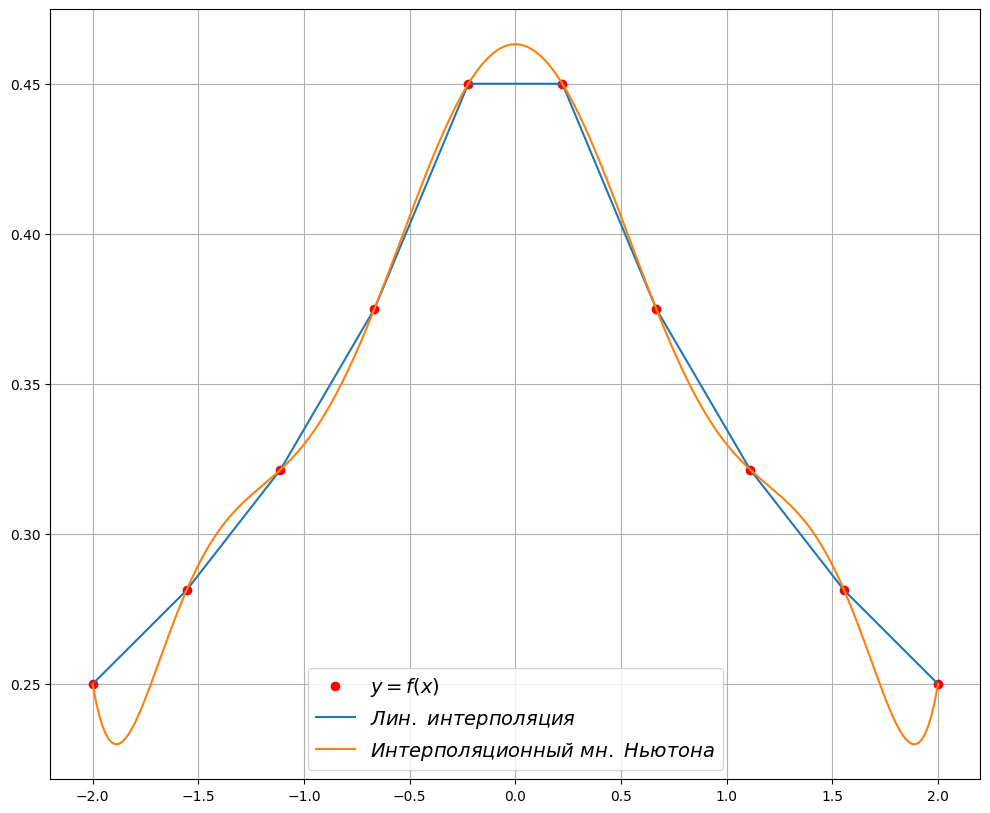

In [31]:
plt.figure(figsize=(12, 10))
plt.plot(x, y, 'or', label="$y=f(x)$")
plt.plot(lin_x, lin_y, label="$Лин. \ интерполяция$")
x_s = np.sort(lin_x)
plt.plot(x_s, inter(x, y, x_s), label="$Интерполяционный \ мн. \ Ньютона$")
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

In [33]:
delta_1 = np.abs(lin_y - (1 / (2 + np.abs(lin_x))))
delta_2 = np.abs(inter(x, y, x_s) - (1 / (2 + np.abs(lin_x))))

In [35]:
print('delta1 = ', delta_1,'\ndelta2 = ', delta_2)

delta1 =  [0.         0.00011605 0.00022467 0.00032578 0.00041929 0.00050512
 0.00058316 0.00065334 0.00071555 0.0007697  0.0008157  0.00085345
 0.00088284 0.00090378 0.00091617 0.00091989 0.00091485 0.00090093
 0.00087803 0.00084604 0.00080484 0.00075431 0.00069434 0.00062482
 0.00054561 0.0004566  0.00035767 0.00024867 0.0001295  0.
 0.00016794 0.00032528 0.00047191 0.00060766 0.00073241 0.00084599
 0.00094828 0.0010391  0.00111831 0.00118576 0.00124128 0.00128471
 0.00131588 0.00133463 0.00134078 0.00133415 0.00131458 0.00128188
 0.00123586 0.00117634 0.00110312 0.00101601 0.00091481 0.00079931
 0.00066931 0.00052459 0.00036495 0.00019016 0.         0.00025606
 0.00049629 0.00072044 0.00092829 0.00111957 0.00129404 0.00145144
 0.00159151 0.00171398 0.00181858 0.00190502 0.00197302 0.0020223
 0.00205255 0.00206346 0.00205474 0.00202606 0.0019771  0.00190753
 0.00181701 0.00170519 0.00157173 0.00141626 0.00123841 0.0010378
 0.00081406 0.00056678 0.00029557 0.         0.00041858 0.0008

In [37]:
len(delta_1) == len(delta_2)

True

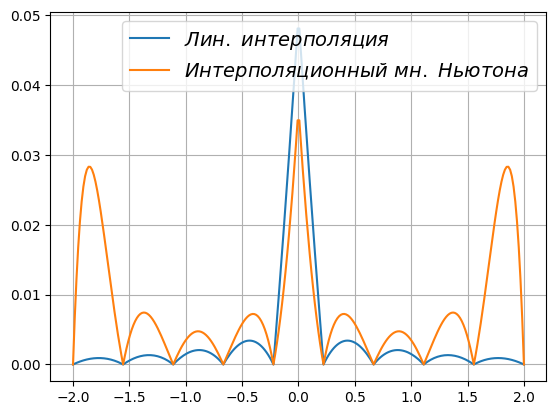

In [39]:
plt.plot(lin_x, delta_1, label="$Лин. \ интерполяция$")
plt.plot(x_s, delta_2, label="$Интерполяционный \ мн. \ Ньютона$")
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

## Заметно, что кусочно-линейная интерполяция гораздо меньше ошибается на крайних промежутках, но хуже ведётся себя на средних значения. При грамотном выборе узловых значений и подходящих функций, интерполяционный многочлен Ньютона покажет будет лучше чем линейная.

## №6.9.3

### Дана функция y=f(x). Приблизить f(x) на отрезке [a, b] методом глобальной интерполяции и указанным в индивидуальном варианте сплайном. На одном чертеже построить графики приближающей функции и функции f(x). Сравнить качество приближения при разном количестве узлов интерполяции.

### y = 7 * e^x * sin(x^2)
### на отрезке [0, 4]

In [43]:
import scipy.interpolate as intp

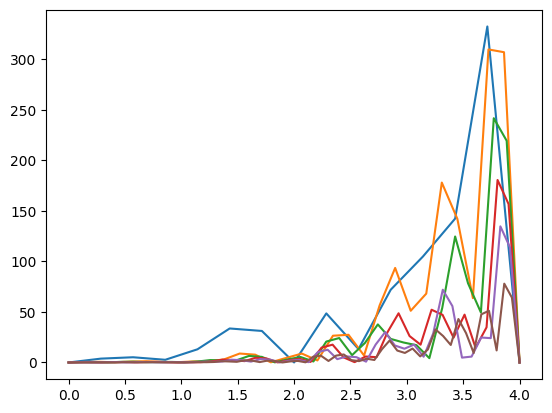

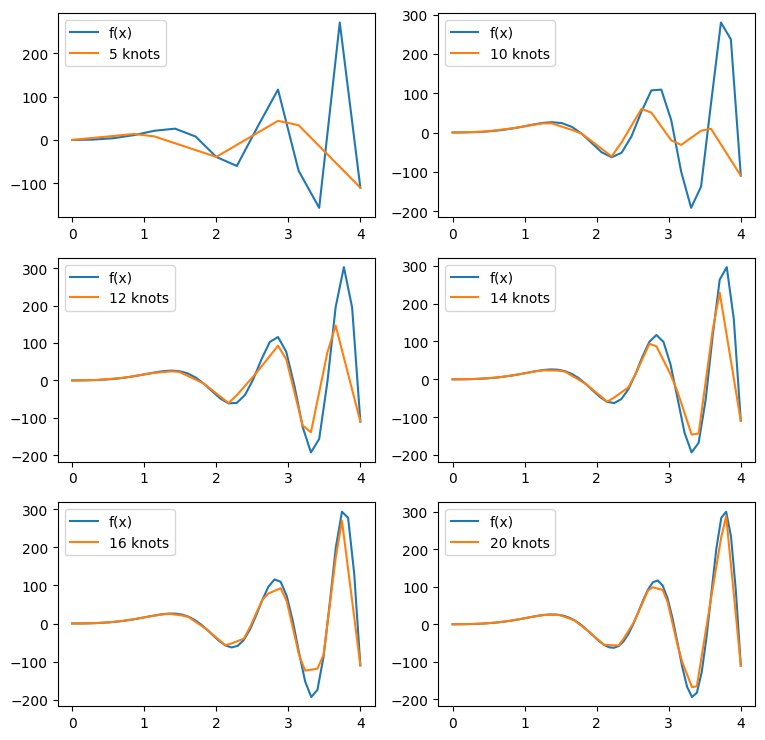

In [59]:
x_m, x_M = 0, 4
fig1, ax1 = plt.subplots(nrows=1, ncols=1)
fig2, ax2 = plt.subplots(nrows=3, ncols=2, figsize=(9, 9))
ks = [5, 10, 12, 14, 16, 20]
for i in range(6):
    k = ks[i]
    x = np.linspace(x_m, x_M, k, endpoint=True)
    wide_x = np.linspace(x_m, x_M, 3 * k, endpoint=True)
    y = 7 * np.e**x * np.sin(x**2)
    wide_y = 7 * np.e**wide_x * np.sin(wide_x**2)
    poly = intp.interp1d(x, y, kind='linear')
    ax1.plot(wide_x, np.abs(wide_y - poly(wide_x)), label=f'{k}')
    ax2[i // 2][i % 2].plot(wide_x, wide_y, label='f(x)')
    ax2[i // 2][i % 2].plot(wide_x, poly(wide_x), label=f'{k} knots')
    ax2[i // 2][i % 2].legend()